Given a review, find the probability of being a positive review or a negative review using deep neural network.

In [ ]:

import tensorflow as tf
from mlxtend.plotting import plot_confusion_matrix
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from tqdm.notebook import tqdm
import warnings
warnings.filterwarnings("ignore")

In [ ]:
vocab_size = 10000
max_len = 200
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=vocab_size)

In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((25000,), (25000,), (25000,), (25000,))

In [ ]:
x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=max_len)
x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test, maxlen=max_len)


In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((25000, 200), (25000,), (25000, 200), (25000,))

In [ ]:


model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 128, input_length=max_len),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

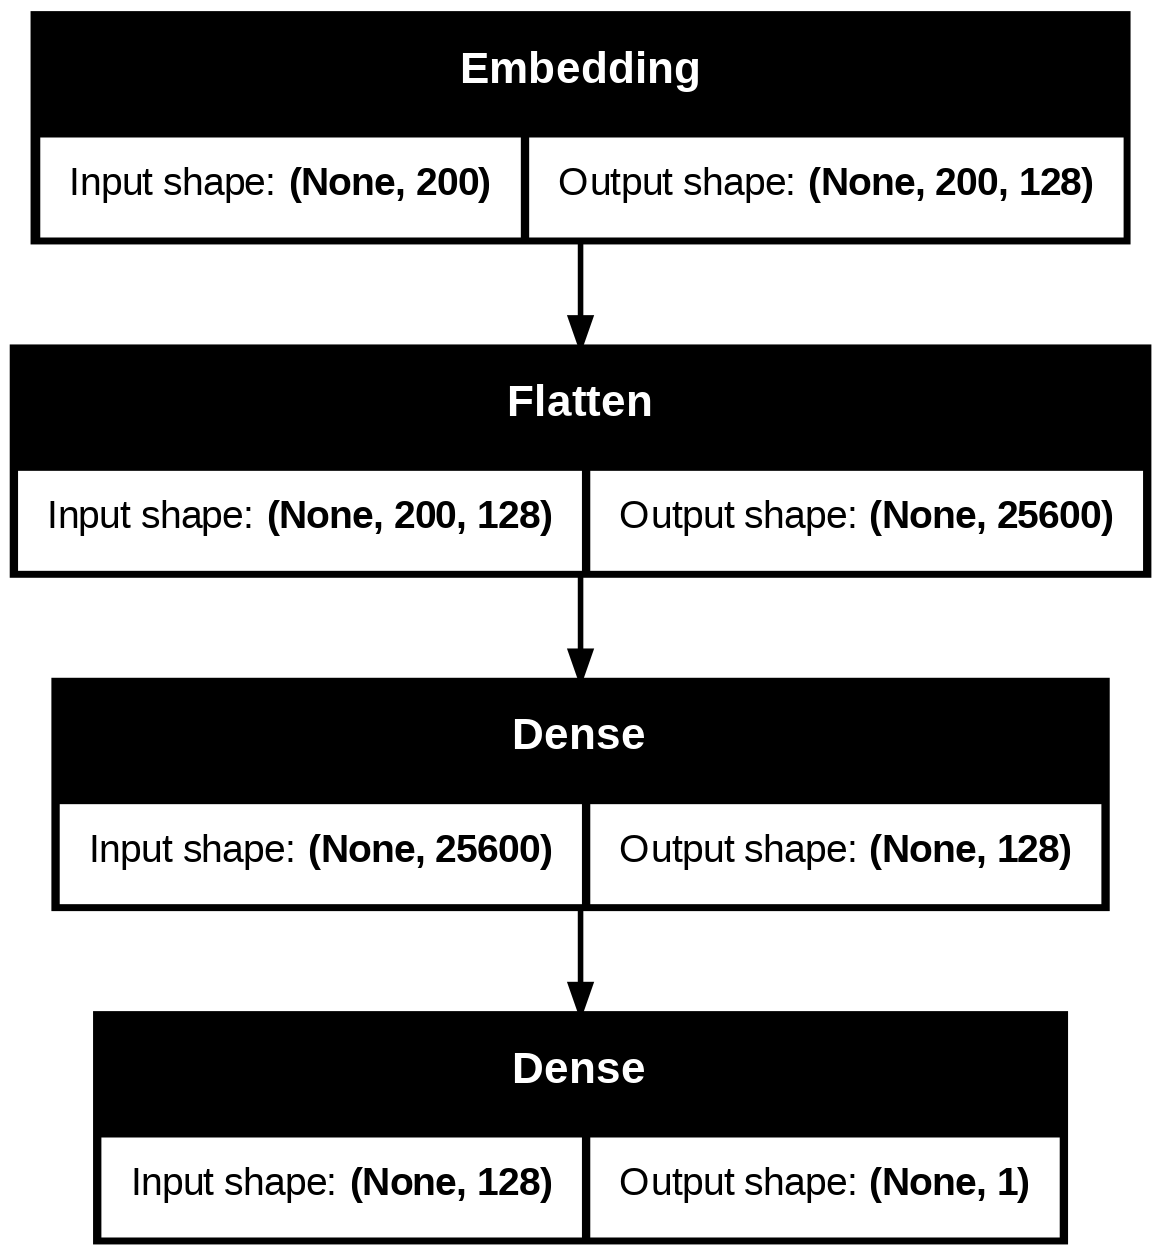

In [ ]:


model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 128, input_length=max_len),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.build(input_shape=(None, max_len))

tf.keras.utils.plot_model(model, show_shapes=True)


In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ (None, 200, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 25600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │     3,276,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,557,057 (17.38 MB)

 Trainable params: 4,557,057 (17.38 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, batch_size=128, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 32s 154ms/step - accuracy: 0.6839 - loss: 0.5481 - val_accuracy: 0.8356 - val_loss: 0.3889
Epoch 2/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 39s 145ms/step - accuracy: 0.9689 - loss: 0.0996 - val_accuracy: 0.8494 - val_loss: 0.3933
Epoch 3/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 48s 183ms/step - accuracy: 0.9985 - loss: 0.0113 - val_accuracy: 0.8503 - val_loss: 0.4753
Epoch 4/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 39s 172ms/step - accuracy: 0.9998 - loss: 0.0021 - val_accuracy: 0.8536 - val_loss: 0.5193
Epoch 5/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 36s 146ms/step - accuracy: 1.0000 - loss: 5.2616e-04 - val_accuracy: 0.8553 - val_loss: 0.5274


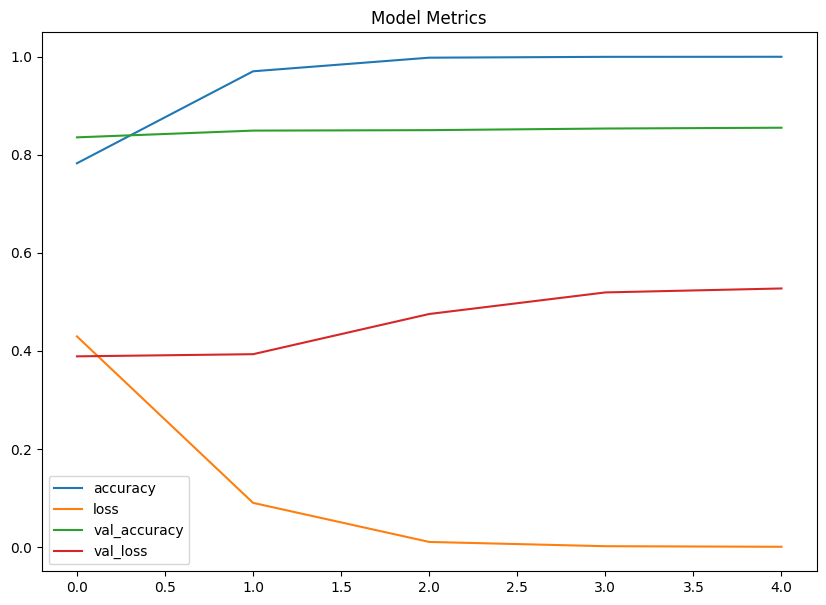

In [ ]:
pd.DataFrame(history.history).plot(figsize=(10,7))
plt.title("Model Metrics")
plt.show()

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Accuracy:", accuracy)

In [ ]:
y_pred = model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step


In [ ]:
y_pred = y_pred.flatten()
y_pred

array([8.3031476e-04, 9.9997926e-01, 8.5123610e-01, ..., 4.8051801e-02,
       1.8216841e-01, 9.7810763e-01], dtype=float32)

In [ ]:
y_pred = (y_pred > 0.5).astype(int)

In [ ]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.85      0.85     12500
           1       0.85      0.86      0.86     12500

    accuracy                           0.86     25000
   macro avg       0.86      0.86      0.86     25000
weighted avg       0.86      0.86      0.86     25000



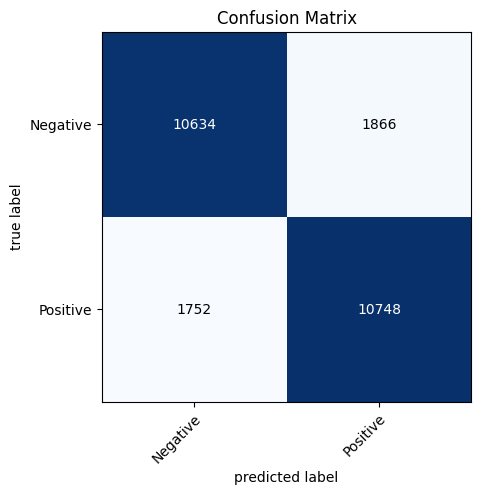

In [ ]:
cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, class_names=['Negative', 'Positive'])
plt.title("Confusion Matrix")
plt.show()
